# Gender recognition by voice
### Progetto di Programmazione di Applicazioni Data Intensive ###

Corso di laurea triennale Ingegneria e Scienze Informatiche

**Sternini Lucia**

Anno accademico 2019/2020

- Importiamo moduli e librerie necessarie

In [301]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#per abilitare il rendering dei grafici all'interno del file Jupyter
%matplotlib inline

- Usiamo la funzione `read_csv` per importare i dati contenuti nel file "voice.csv"

In [302]:
data = pd.read_csv("voice.csv")

In [303]:
data

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0      274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1      634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2     1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3        4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4        4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
...           ...       ...       ...  ...       ...       ...       ...   
3163     6.630383  0.962934  0.763182  ...  0.131884  0.182790  0.083770   
3164     2.503954  0.960716  0.709570  ...  0.116221  0.188980  0.034409   
3165     6.604509  0.946854  0.654196  ...  0.142056  0.209918  0.039506   
3166     5.388298  0.950436  0.675470  ...  0.143659  0.172375  0.034483   
3167     5.769115  0.938829  0.601529  ...  0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
0     0.275862  0.007812  0.007812  0.007812  0.000000  0.000000    male  
1     0.250000  0.009014  0.007812  0.054688  0.046875  0.052632    male  
2     0.271186  0.007990  0.007812  0.015625  0.007812  0.046512    male  
3     0.250000  0.201497  0.007812  0.562500  0.554688  0.247119    male  
4     0.266667  0.712812  0.007812  5.484375  5.476562  0.208274    male  
...        ...       ...       ...       ...       ...       ...     ...  
3163  0.262295  0.832899  0.007812  4.210938  4.203125  0.161929  female  
3164  0.275862  0.909856  0.039062  3.679688  3.640625  0.277897  female  
3165  0.275862  0.494271  0.007812  2.937500  2.929688  0.194759  female  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002  female  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000  female  

[3168 rows x 21 columns]

In [304]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [305]:
data.shape

(3168, 21)

## 1a) Descrizione del problema

Come si nota, il dataset contiene 3168 righe e 21 colonne.
Le righe costituiscono *campioni vocali* registrati, raccolti da altoparlanti. I campioni vocali sono stati pre-elaborati mediante analisi acustica in R, con una gamma di frequenza analizzata di 0hz-280hz (range vocale umano). 
Di ogni campione vocale abbiamo le seguenti *feature acustiche*:

- **meanfreq** : *frequenza* media (in kHz), numero di ripetizioni del ciclo d'onda per secondo
- **sd** : deviazione standard della frequenza
- **median** : frequenza mediana (in kHz)
- **Q25** : primo quantile (in kHz)
- **Q75** : terzo quantile (in kHz)
- **IQR** : intervallo o scarto interquartile (in kHz), differenza tra Q75 e Q25
- **skew** : skewness (indice di asimmetria)
- **kurt** : curtosi (altro indice statistico, allontanamento dalla normalità distributiva)
- **sp.ent** : entropia spettrale
- **sfm** : piattezza spettrale 
- **mode** : modalità frequenza
- **centroide** : individua il punto medio della distribuzione di energia del suono (www.datrevo.com)
- **meanfun** : media della *frequenza fondamentale* misurata su un segnale acustico (è la frequenza con cui vibrano le corde vocali)
- **minfun** : frequenza fondamentale minima misurata tramite segnale acustico
- **maxfun** : massima frequenza fondamentale misurata tramite segnale acustico
- **meandom** : media della *frequenza dominante* (frequenza con picco di energia spettrale più alto) misurata attraverso il segnale acustico
- **mindom** : frequenza minima dominante misurata attraverso il segnale acustico
- **maxdom** : massimo della frequenza dominante misurata attraverso il segnale acustico
- **dfrange** : gamma della frequenza dominante misurata attraverso il segnale acustico
- **modindx** : indice di modulazione. Calcolato come la differenza assoluta accumulata tra misurazioni adiacenti delle frequenze fondamentali divise per la gamma di frequenze

Si vuole classificare se una voce è maschile o femminile, in base alle proprietà acustiche della voce e del discorso. 

Utilizziamo il metodo `info` per vedere la memoria occupata dal DataFrame e i tipi delle colonne assegnati da pandas, al fine di sapere il tipo delle variabili con cui lavoreremo.

In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


La variabile da predire è **label** ed è di tipo `object` poichè è una stringa. 

In [307]:
data["label"].unique()

array(['male', 'female'], dtype=object)

Assume due valori dunque possiamo dire che è una variabile **categorica** e possiamo convertirla nel tipo appropriato così risparmiamo occupazione di memoria, anche se è un dataset di dimensioni piccole. Inoltre, cambiamo l'intestazione della colonna a *gender* che è più intuitivo.

In [308]:
data = pd.read_csv("voice.csv", dtype={"label": "category"})
data = data.rename(columns={'label':'gender'})

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
gender      3168 non-null category
dtypes: category(1), float64(20)
memory usage: 498.3 KB


Tutti gli altri attributi sono variabili continue di tipo float.

Di seguito, controlliamo se nel dataset abbiamo valori mancanti e notiamo che non ce ne sono.

In [310]:
data.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
gender      0
dtype: int64

## 1b) Analisi esplorativa dei dati

Con `describe`, possiamo ottenere le statistiche di base per le colonne numeriche.

In [311]:
data.describe()

meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042560     1.649569     5.669547     0.861811     0.258041   
50%       0.094280     2.197101     8.318463     0.901767     0.396335   
75%       0.114175     2.931694    13.648905     0.928713     0.533676   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.165282     0.180907     0.142807     0.036802     0.258842   
std       0.077203     0.029918     0.032304     0.019220     0.030077   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118016     0.163662     0.116998     0.018223     0.253968   
50%       0.186599     0.184838     0.140519     0.046110     0.271186   
75%       0.221104     0.199146     0.169581     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.829211     0.052647     5.047277     4.994630     0.173752  
std       0.525205     0.063299     3.521157     3.520039     0.119454  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.419828     0.007812     2.070312     2.044922     0.099766  
50%       0.765795     0.023438     4.992188     4.945312     0.139357  
75%       1.177166     0.070312     7.007812     6.992188     0.209183  
max       2.957682     0.458984    21.867188    21.843750     0.932374

Notiamo, ad esempio, che meanfreq va da 39 Hz a 251 Hz. meanfun va da 55 Hz a 237 Hz. meandom da 0.008 a 2.958 (circa)

Per analizzare la distribuzione dei valori nella colonna nominale *gender*, possiamo utilizzare `value_counts`, specificando anche `normalize=True`, se vogliamo visualizzare la percentuale.

In [312]:
data["gender"].value_counts()

male      1584
female    1584
Name: gender, dtype: int64

In [313]:
data["gender"].value_counts(normalize=True)

male      0.5
female    0.5
Name: gender, dtype: float64

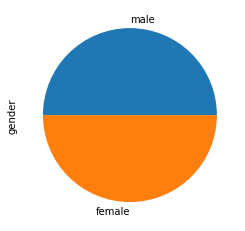

In [314]:
data["gender"].value_counts().plot.pie()

La percentuale di maschi è uguale a quella delle femmine. Si tratta dunque di un problema con classi **bilanciate**.

Visualizziamo la distribuzione dei valori di *frequenza media* e *frequenza dominante* in un `istogramma`.

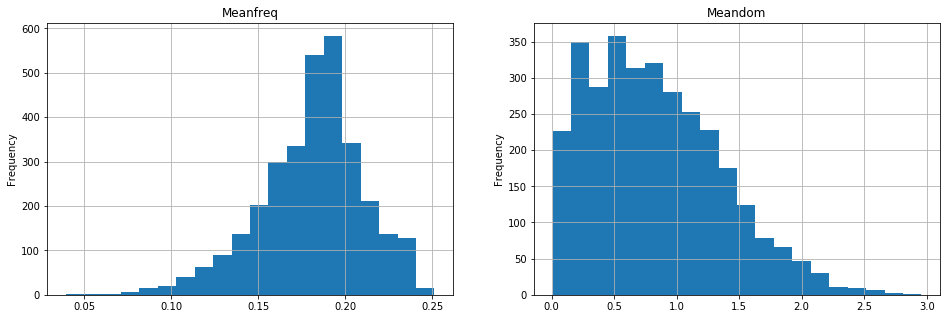

In [315]:
plt.figure(figsize=(16, 5))
data["meanfreq"].plot.hist(ax=plt.subplot(1,2,1), bins=20);
plt.grid(axis="y")
plt.grid(axis="x")
plt.title("Meanfreq");
data["meandom"].plot.hist(ax=plt.subplot(1,2,2), bins=20);
plt.grid(axis="y")
plt.grid(axis="x")
plt.title("Meandom");

Possiamo eseguire anche il *binning* o *discretizzazione* delle colonne numeriche, utilizzando la funzione `cut` e suddividendo così i valori in **fasce** di uguale ampiezza e contarne i valori in ciascuna.

In [316]:
pd.cut(data["meanfreq"],6).value_counts() #6 fasce

(0.181, 0.216]      1458
(0.145, 0.181]       995
(0.216, 0.251]       342
(0.11, 0.145]        310
(0.0747, 0.11]        57
(0.0392, 0.0747]       6
Name: meanfreq, dtype: int64

In [317]:
pd.cut(data["meandom"],4).value_counts() #4 fasce

(0.00486, 0.745]    1535
(0.745, 1.483]      1257
(1.483, 2.22]        346
(2.22, 2.958]         30
Name: meandom, dtype: int64

Come si nota anche dai grafici precedenti, la maggior parte dei valori di frequenza media è compresa tra 0.18 e 0.20 mentre la maggior parte dei valori di frequenza dominante è inferiore a 1.5 circa.

Visualizziamo ora le *statistiche di base* sui valori di alcune feature mediante `boxplot`.

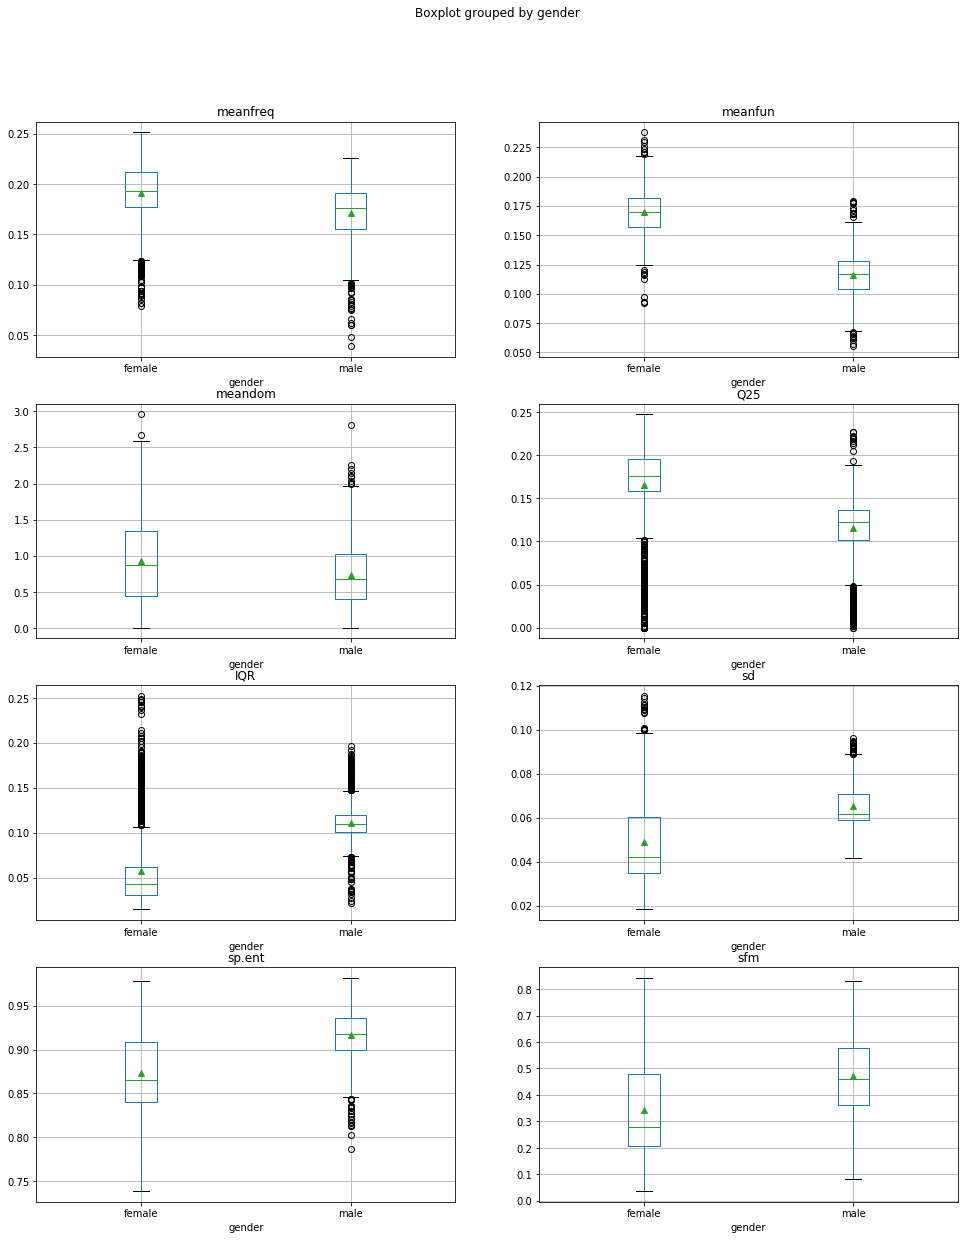

In [318]:
plt.figure(figsize=(16, 20))
data.boxplot(ax=plt.subplot(4,2,1), column="meanfreq", by="gender", showmeans=True);
data.boxplot(ax=plt.subplot(4,2,2), column="meanfun", by="gender", showmeans=True);
data.boxplot(ax=plt.subplot(4,2,3), column="meandom", by="gender", showmeans=True);
data.boxplot(ax=plt.subplot(4,2,4), column="Q25", by="gender", showmeans=True);
data.boxplot(ax=plt.subplot(4,2,5), column="IQR", by="gender", showmeans=True);
data.boxplot(ax=plt.subplot(4,2,6), column="sd", by="gender", showmeans=True);
data.boxplot(ax=plt.subplot(4,2,7), column="sp.ent", by="gender", showmeans=True);
data.boxplot(ax=plt.subplot(4,2,8), column="sfm", by="gender", showmeans=True);

### CONSIDERAZIONI: ### 
- *meanfreq*, la frequenza media è leggermente più alta nelle femmine. La frequenza comunque può variare notevolmente all'interno di una parola pronunciata o ancora di più di un'intera frase. La frequenza aumenta e diminuisce con l'intonazione, spesso per comunicare determinate emozioni all'interno delle parole e del discorso.
- *meanfun*, la frequenza fondamentale è molto più alta nelle femmine che nei maschi. Quella media maschile è inferiore al valore minimo di quella femminile. Sembra essere una feature staticamente significativa rispetto al genere.
- *meandom*, ha un valore massimo più alto nelle voci femminili e anche la media è leggermente più alta. Sembra essere abbastanza significativa rispetto al genere ma non tanto per rilevare il genere di una voce. La frequenza dominante mi dice quanto è alto o basso il suono di una voce.
- *Q25*, il primo quantile è mediamente più alto nelle femmine. Vi sono molti outliers nelle femmine.
- *IQR*, lo scarto interquartile è più alto nei maschi. Vi sono molti outiers nelle femmine.
- *sd*, la deviazione standard è più alta nei maschi.
- *sp.ent*, l'entropia spettrale è più alta negli uomini.

Possiamo dire che tra quelle analizzate, probabilmente le features più correlate con la variabile da predire sono: meanfun, Q25, sp.ent e IQR. 

Con l'operazione di *pivoting* possiamo sdoppiare ciscuna colonna del dataframe, suddividendo i valori relativi alle classi female e male, al fine di visualizzare meglio quanto le variabili predittive siano correlate con la classe da predire.

In [319]:
data.pivot(columns="gender")

meanfreq                  sd              median                 Q25  \
gender    female      male    female      male    female      male    female   
0            NaN  0.059781       NaN  0.064241       NaN  0.032027       NaN   
1            NaN  0.066009       NaN  0.067310       NaN  0.040229       NaN   
2            NaN  0.077316       NaN  0.083829       NaN  0.036718       NaN   
3            NaN  0.151228       NaN  0.072111       NaN  0.158011       NaN   
4            NaN  0.135120       NaN  0.079146       NaN  0.124656       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
3163    0.131884       NaN  0.084734       NaN  0.153707       NaN  0.049285   
3164    0.116221       NaN  0.089221       NaN  0.076758       NaN  0.042718   
3165    0.142056       NaN  0.095798       NaN  0.183731       NaN  0.033424   
3166    0.143659       NaN  0.090628       NaN  0.184976       NaN  0.043508   
3167    0.165509       NaN  0.092884       NaN  0.183044       NaN  0.070072   

                       Q75            ...   meandom              mindom  \
gender      male    female      male  ...    female      male    female   
0       0.015071       NaN  0.090193  ...       NaN  0.007812       NaN   
1       0.019414       NaN  0.092666  ...       NaN  0.009014       NaN   
2       0.008701       NaN  0.131908  ...       NaN  0.007990       NaN   
3       0.096582       NaN  0.207955  ...       NaN  0.201497       NaN   
4       0.078720       NaN  0.206045  ...       NaN  0.712812       NaN   
...          ...       ...       ...  ...       ...       ...       ...   
3163         NaN  0.201144       NaN  ...  0.832899       NaN  0.007812   
3164         NaN  0.204911       NaN  ...  0.909856       NaN  0.039062   
3165         NaN  0.224360       NaN  ...  0.494271       NaN  0.007812   
3166         NaN  0.219943       NaN  ...  0.791360       NaN  0.007812   
3167         NaN  0.250827       NaN  ...  0.227022       NaN  0.007812   

                    maxdom             dfrange             modindx            
gender      male    female      male    female      male    female      male  
0       0.007812       NaN  0.007812       NaN  0.000000       NaN  0.000000  
1       0.007812       NaN  0.054688       NaN  0.046875       NaN  0.052632  
2       0.007812       NaN  0.015625       NaN  0.007812       NaN  0.046512  
3       0.007812       NaN  0.562500       NaN  0.554688       NaN  0.247119  
4       0.007812       NaN  5.484375       NaN  5.476562       NaN  0.208274  
...          ...       ...       ...       ...       ...       ...       ...  
3163         NaN  4.210938       NaN  4.203125       NaN  0.161929       NaN  
3164         NaN  3.679688       NaN  3.640625       NaN  0.277897       NaN  
3165         NaN  2.937500       NaN  2.929688       NaN  0.194759       NaN  
3166         NaN  3.593750       NaN  3.585938       NaN  0.311002       NaN  
3167         NaN  0.554688       NaN  0.546875       NaN  0.350000       NaN  

[3168 rows x 40 columns]

Analizziamo le variabili riguardo alle seguenti frequenze medie: meanfreq, meanfun e meandom.

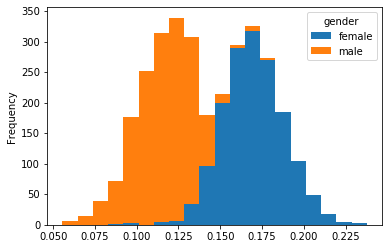

In [320]:
data.pivot(columns="gender")["meanfun"].plot.hist(bins=20, stacked=True);

La frequenza fondamentale di un parlato conversazionale è mediamente compresa tra 70 e 150 Hz per una voce maschile e tra 150 e 250 Hz per una voce femminile. Tali differenze sono dovute alla diversa lunghezza e al diverso spessore delle corde vocali, più lunghe e spesse nell’uomo, più corte e sottili nella donna. (http://www.treccani.it/enciclopedia/fonetica-acustica-nozioni-e-termini-di_(Enciclopedia-dell'Italiano)/#:~:text=La%20frequenza%20fondamentale%20di%20un,per%20una%20voce%20di%20bambino.)
La frequenza fondamentale corrisponde all'altezza o tono del suono ed è una delle caratteristiche principali di un suono. L'altezza è la qualità che permette di distinguere se un suono è acuto o grave e dipende dalla frequenza dell'onda sonora che lo ha generato.
Sicuramente, come abbiamo già notato in precedenza, questa è una variabile significativa ma non sufficiente per distinguere le voci femminili da quelle maschili.

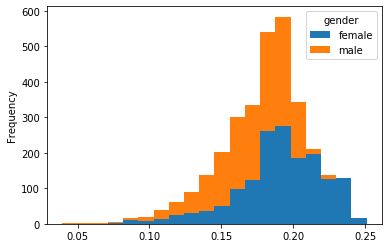

In [321]:
data.pivot(columns="gender")["meanfreq"].plot.hist(bins=20, stacked=True);

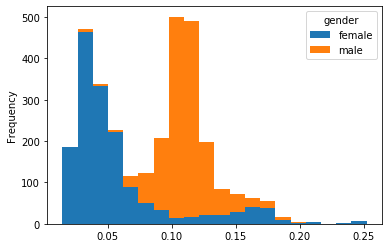

In [322]:
data.pivot(columns="gender")["IQR"].plot.hist(bins=20, stacked=True);

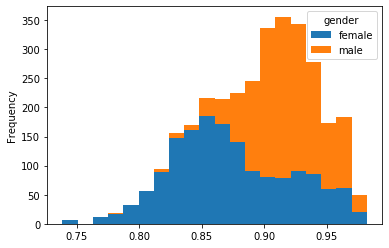

In [323]:
data.pivot(columns="gender")["sp.ent"].plot.hist(bins=20, stacked=True);

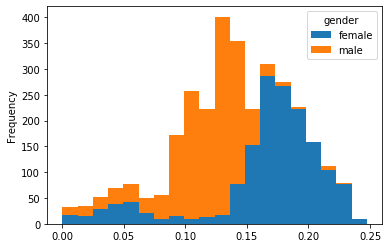

In [324]:
data.pivot(columns="gender")["Q25"].plot.hist(bins=20, stacked=True);

Possiamo visualizzare i valori medi di tutte le feature, distinti per genere, raggruppandoli per quest'ultimo.

In [325]:
data_by_gender = data.groupby("gender")
data_by_gender.mean()

meanfreq        sd    median       Q25       Q75       IQR      skew  \
gender                                                                         
female  0.191000  0.049142  0.195942  0.165349  0.223184  0.057834  2.984875   
male    0.170813  0.065110  0.175299  0.115562  0.226346  0.110784  3.295460   

             kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
gender                                                                          
female  24.805224  0.873066  0.344763  0.178541  0.191000  0.169742  0.039429   
male    48.331698  0.917188  0.471670  0.152022  0.170813  0.115872  0.034175   

          maxfun   meandom    mindom    maxdom   dfrange   modindx  
gender                                                              
female  0.263848  0.929544  0.064987  5.736107  5.671120  0.170073  
male    0.253836  0.728877  0.040307  4.358447  4.318139  0.177430

Per valutare visivamente la correlazione tra due variabili, possiamo selezionarne alcune ed evidenziare anche le due diverse classi nel `diagramma a dispersione`, differenziando i punti ad esempio per colore mediante un dizionario che associ blu ai maschi e rosa alle femmine.

In [326]:
gender_color_map = {"male": "blue", "female": "pink"}
gender_colors = data["gender"].map(gender_color_map)

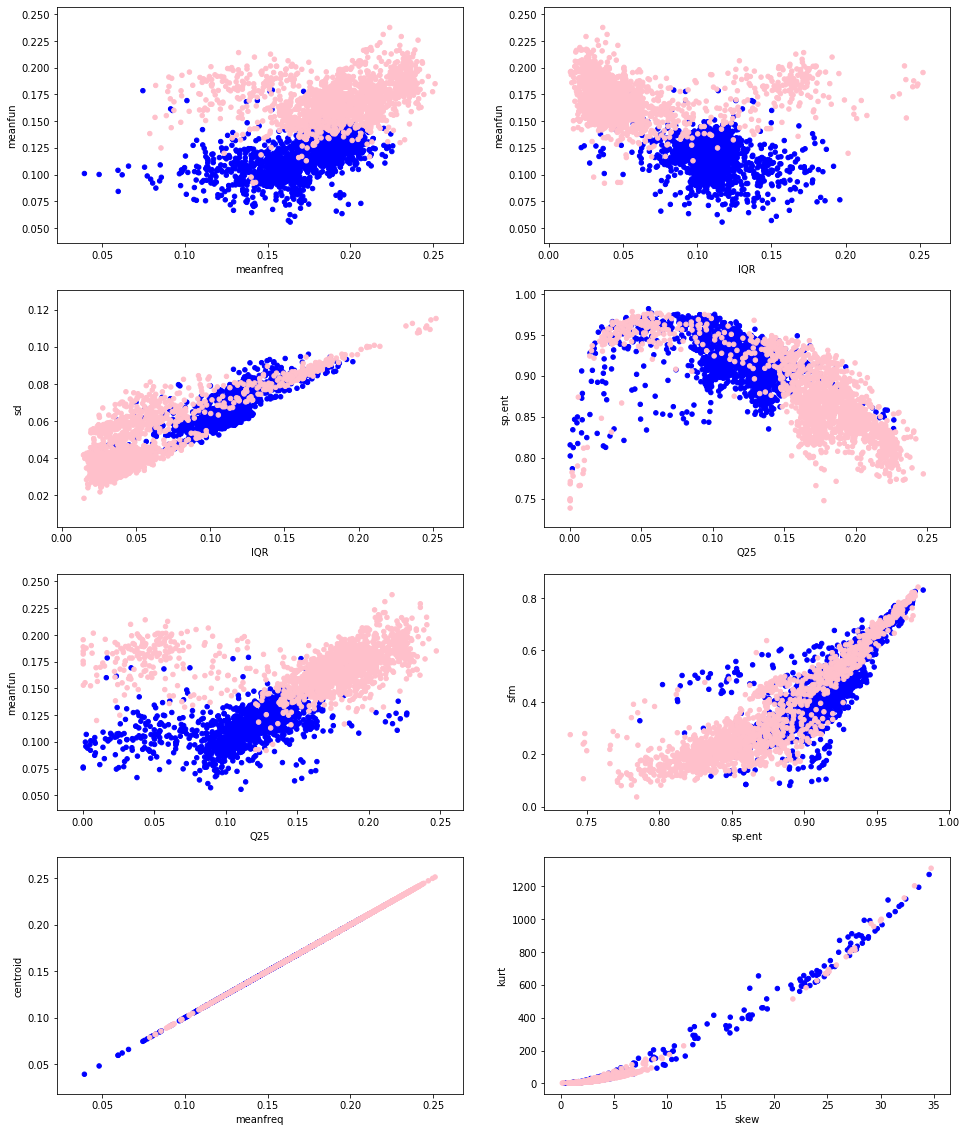

In [327]:
plt.figure(figsize=(16, 20))
data.plot.scatter(ax=plt.subplot(4,2,1), x="meanfreq", y="meanfun", c=gender_colors);
data.plot.scatter(ax=plt.subplot(4,2,2), x="IQR", y="meanfun", c=gender_colors);
data.plot.scatter(ax=plt.subplot(4,2,3), x="IQR", y="sd", c=gender_colors);
data.plot.scatter(ax=plt.subplot(4,2,4), x="Q25", y="sp.ent", c=gender_colors);
data.plot.scatter(ax=plt.subplot(4,2,5), x="Q25", y="meanfun", c=gender_colors);
data.plot.scatter(ax=plt.subplot(4,2,6), x="sp.ent", y="sfm", c=gender_colors);
data.plot.scatter(ax=plt.subplot(4,2,7), x="meanfreq", y="centroid", c=gender_colors);
data.plot.scatter(ax=plt.subplot(4,2,8), x="skew", y="kurt", c=gender_colors);

Negli ultimi due grafici notiamo che c'è una **dipendenza** fra le variabili. A conferma, calcoliamo i seguenti *coefficienti di correlazione di Pearson*.

In [328]:
meanfreq = data["meanfreq"]
centroid = data["centroid"]
skew = data["skew"]
kurt = data["kurt"]
sd = data["sd"]
spent = data["sp.ent"] 
q25 = data["Q25"]
iqr = data["IQR"]

In [329]:
np.mean((meanfreq-meanfreq.mean()) * (centroid-centroid.mean())) / (meanfreq.std() * centroid.std()) #coeff pearson -> sono molto correlate direttamente, forte dipendenza

0.9996843434343434

In [330]:
np.mean((skew-skew.mean()) * (kurt-kurt.mean())) / (skew.std() * kurt.std())

0.9767120532983152

In [331]:
np.mean((iqr-iqr.mean()) * (sd-sd.mean())) / (iqr.std() * sd.std()) 

0.8743842267376537

I valori del coefficiente di Pearson sono molto **vicini a 1** (*correlazione diretta*): al crescere dell'una, cresce anche l'altra.

In [332]:
np.mean((spent-spent.mean()) * (q25-q25.mean())) / (spent.std() * q25.std()) #correlazione inversa: al crescere di Q25, sp.ent decresce

-0.6479212479422225

Considerazione riguardo alle variabili *centroid* e *meanfreq*: esse presentano praticamente tutti valori uguali e quindi mantenerle entrambe può rendere difficile distinguere una voce maschile da una femminile. Pertanto, successivamente si deciderà di non considerare la variabile *centroid* nell'addestramento dei modelli.

## 2) Normalizzazione e rilevazione delle feature più rilevanti

Procediamo ora con la *normalizzazione/standardizzazione* delle variabili.
La normalizzazione è necessaria in quanto le variabili coinvolte sono in scale diverse e questo può rendere difficile l'interpretazione dei modelli che addestreremo. Si può notare ad esempio dalle colonne `kurt` e `meanfun`.

In [333]:
data[["kurt", "meanfun"]].head(10)

kurt   meanfun
0   274.402906  0.084279
1   634.613855  0.107937
2  1024.927705  0.098706
3     4.177296  0.088965
4     4.333713  0.106398
5     8.308895  0.110132
6     5.987498  0.105945
7     4.766611  0.093052
8     4.070284  0.096729
9     4.787310  0.105881

Effettueremo la standardizzazione dopo aver applicato il metodo *Hold-Out* per suddividere i dati in training e validation set in preparazione all'addestramento dei modelli.

In [334]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Perceptron

Distinguiamo la variabile da predire rispetto a tutte le altre.

In [335]:
y = data["gender"] #variabile da predire
X = data.drop(columns=['gender', 'centroid']) #variabili predittive

Applichiamo il metodo Hold-Out per partizionare *casualmente* i dati, riservandone i 2/3 al training set e il restante al validation set.

In [336]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=1/3, random_state=42) 

Applichiamo la normalizzazione 

In [337]:
scaler = StandardScaler()
Xn_train = scaler.fit_transform(X_train)

In [338]:
Xn_val = scaler.transform(X_val)

Addestriamo ad esempio un modello **Perceptron**.

In [339]:
model = Perceptron(random_state=42) 
model.fit(Xn_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [340]:
model.coef_

array([[  0.27842195,   3.7509599 ,  -0.35603114,  -5.49809866,
          0.88938241,   6.77175201,  -1.23256274,  -2.90675711,
          7.51494393, -11.5868528 ,  -1.09174267, -31.70915728,
          2.91172516,  -1.13324483,   0.37821835,   0.22442642,
         -2.97035006,  -2.97466286,  -0.09155617]])

In [341]:
model.intercept_

array([-6.])

Calcoliamo l'accuratezza (percentuale delle istanze corrette) del modello con il metodo `score`.

In [342]:
model_score = model.score(Xn_val, y_val) #il modello descrive bene i dati (vicino a 1)

In [343]:
model_score

0.9630681818181818

Il **96%** delle istanze del validation set è stata classificata correttamente. Calcoliamo di seguito il numero di quelle corrette e quelle errate.

In [348]:
correct_class = model.predict(Xn_val) == y_val

In [349]:
correct_class.value_counts() #1017 istanze classificate correttamente

True     1017
False      39
Name: gender, dtype: int64

Come da specifiche, riaddestriamo il modello **Perceptron** considerando tutte le proprietà acustiche per vedere ancora meglio quali feature sono *staticamente significative* per determinare il sesso. Utilizziamo la **regolarizzazione L1 (Lasso)**, che permette di azzerare i pesi delle variabili meno significative. Scegliamo un peso *alpha* (iperparametro) basso così da effettuare una regolarizzazione *intensa*.

In [351]:
model_l1 = Perceptron(penalty='l1', alpha=0.0001, random_state=42)
model_l1.fit(Xn_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty='l1', random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [352]:
pd.Series(model_l1.coef_[0], index=X_train.columns)

meanfreq     0.000000
sd           0.000000
median      -3.566679
Q25         -5.274406
Q75          0.356195
IQR          7.103536
skew         1.877938
kurt        -4.039880
sp.ent       4.994851
sfm        -11.261783
mode         0.000000
meanfun    -30.599888
minfun       3.545821
maxfun       0.173020
meandom      1.018850
mindom       4.993582
maxdom      -0.196083
dfrange     -0.306928
modindx     -5.119548
dtype: float64

I coefficienti di alcune feature si *annullano* per le dipendenze che hanno fra loro, individuate anche nei grafici precedenti.

In [354]:
model_l1.score(Xn_val, y_val) #accuratezza migliorata

0.9668560606060606

Proviamo ad addestrarlo solo su **3 feature**, che scegliamo tra le più rilevanti.

In [355]:
X = data[["IQR", "sp.ent","meanfun"]]

In [356]:
X3_train, X3_val, y3_train, y3_val = \
    train_test_split(X, y, test_size=1/3, random_state=42) #2/3 training, 1/3 validation

In [357]:
scaler = StandardScaler()
X3n_train = scaler.fit_transform(X3_train)
X3n_val = scaler.transform(X3_val)

In [359]:
model_3f = Perceptron(random_state=42) 
model_3f.fit(X3n_train, y3_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [360]:
model_3f.score(X3n_val, y3_val) 

0.9507575757575758

In [361]:
model_score #accuratezza del modello che considera tutte le feature

0.9630681818181818

In [364]:
correct_class = model_3f.predict(X3n_val) == y3_val

In [365]:
correct_class.value_counts()

True     1004
False      52
Name: gender, dtype: int64

Il modello addestrato considerando solo 3 feature risulta essere meno accurato rispetto al modello che le considera tutte. Si decide pertanto di considerare tutte le variabili nel successivo addestramento dei modelli. 

## 3) Generazione di modelli di learning

In [366]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Precedentemente abbiamo impostato manualmente i diversi valori degli iperparametri. Per individuare quelli migliori (quelli che massimizzano l'accuratezza), utilizziamo grid search e k-fold cross validation.

Si sceglie StratifiedKFold piuttosto che KFold per avere uguale distribuzione delle classi fra un fold e l'altro. Iperparametri impostati: casualità 42 e numero fold 4.

In [367]:
skf = StratifiedKFold(4, shuffle=True, random_state=42)

In [386]:
for train, val in skf.split(Xn_train, y_train):
    print(y_train.iloc[val].value_counts())

female    270
male      258
Name: gender, dtype: int64
female    270
male      258
Name: gender, dtype: int64
female    270
male      258
Name: gender, dtype: int64
female    270
male      258
Name: gender, dtype: int64


Addestriamo ora 4 modelli: Perceptron, LogisticRegression, Support Vector Machines e Knn.

### Perceptron

In [369]:
model_per = Perceptron(random_state=42)

In [370]:
per_grid = {
    "penalty": ["l2", "l1", "elasticnet"],
    "alpha": [0.0001, 0.001, 0.01, 1]
}

In [371]:
per_gs = GridSearchCV(model_per, per_grid, cv=skf)
per_gs.fit(Xn_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=42, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [372]:
per_score = per_gs.score(Xn_val,y_val)

In [373]:
per_gs.best_score_ 

0.962594696969697

In [374]:
per_gs.best_params_

{'alpha': 0.001, 'penalty': 'l1'}

In [375]:
pd.DataFrame(per_gs.cv_results_).sort_values("rank_test_score").head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
4       0.007701      0.001608         0.002737        0.000435       0.001   
1       0.007312      0.001618         0.002891        0.000132      0.0001   
7       0.006990      0.000986         0.002735        0.000422        0.01   
0       0.004530      0.000545         0.002200        0.000484      0.0001   
2       0.007884      0.002392         0.002710        0.000416      0.0001   

  param_penalty                                      params  \
4            l1           {'alpha': 0.001, 'penalty': 'l1'}   
1            l1          {'alpha': 0.0001, 'penalty': 'l1'}   
7            l1            {'alpha': 0.01, 'penalty': 'l1'}   
0            l2          {'alpha': 0.0001, 'penalty': 'l2'}   
2    elasticnet  {'alpha': 0.0001, 'penalty': 'elasticnet'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
4           0.965909           0.956439           0.967803           0.960227   
1           0.965909           0.965909           0.956439           0.958333   
7           0.962121           0.967803           0.941288           0.943182   
0           0.950758           0.964015           0.945076           0.939394   
2           0.950758           0.964015           0.945076           0.939394   

   mean_test_score  std_test_score  rank_test_score  
4         0.962595        0.004517                1  
1         0.961648        0.004314                2  
7         0.953598        0.011559                3  
0         0.949811        0.009132                4  
2         0.949811        0.009132                4

### LogisticRegression

In [376]:
model_lr = LogisticRegression(solver="saga", random_state=42)

In [377]:
lr_grid = [
    {
        "penalty": ["l2", "l1"],
        "C": [0.01, 0.1, 1, 10]
    },
    {
        "penalty": ["elasticnet"],
        "C": [0.01, 0.1, 1, 10],
        "l1_ratio": [0.2, 0.5]
    }
]

In [378]:
lr_gs = GridSearchCV(model_lr, lr_grid, cv=skf)
lr_gs.fit(Xn_train,y_train)

C:\Users\lucia\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lucia\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lucia\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lucia\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lucia\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'penalty': ['l2', 'l1']},
                         {'C': [0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5],
                          'penalty': ['elasticnet']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score

In [379]:
lr_score = lr_gs.score(Xn_val,y_val)

In [380]:
lr_gs.best_score_

0.974905303030303

In [381]:
lr_gs.best_params_

{'C': 10, 'penalty': 'l1'}

### Support Vector Machines

In [382]:
model_svm =  SVC(random_state=42)

svm_grid = [
  {'C': [0.01, 0.1, 1, 10,100], 'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1, 10,100]},
  {'C': [0.01, 0.1, 1, 10,100], 'kernel': ['linear']}
]

svm_gs = GridSearchCV(model_svm, svm_grid, cv=skf)
svm_gs.fit(Xn_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [383]:
svm_score = svm_gs.score(Xn_val,y_val)

In [384]:
svm_gs.best_score_

0.9815340909090909

In [387]:
svm_gs.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

### KNeighborsClassifier

In [388]:
model_knn =  KNeighborsClassifier()

knn_grid = {'n_neighbors': range(1, 10, 1),
            'weights': ['uniform', 'distance']}

knn_gs = GridSearchCV(model_knn, knn_grid, cv=skf)
knn_gs.fit(Xn_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 10),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [389]:
knn_score = knn_gs.score(Xn_val,y_val)

In [390]:
knn_gs.best_score_

0.9763257575757576

In [391]:
knn_gs.best_params_

{'n_neighbors': 4, 'weights': 'uniform'}

Salviamo i modelli ritenuti migliori in una variabile.

In [392]:
model_per = per_gs.best_estimator_

In [393]:
model_lr = lr_gs.best_estimator_

In [394]:
model_svm = svm_gs.best_estimator_

In [395]:
model_knn = knn_gs.best_estimator_

## 4) Valutazione dei modelli

In [396]:
from sklearn.model_selection import cross_val_score
from scipy.stats import norm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier

Per ciascun modello, calcoliamo lo **scarto quadratico medio** (o deviazione standard) dell'errore dei relativi iperparametri ottenuto in k cross fold validation. 

In [397]:
pd.Series([cross_val_score(model_per,Xn_val, y_val,cv=skf).std(), cross_val_score(model_lr, Xn_val,y_val,cv=skf).std(), cross_val_score(model_svm, Xn_val,y_val,cv=skf).std(), cross_val_score(model_knn, Xn_val,y_val,cv=skf).std()], ['Perceptron', 'LogisticRegression', 'SVM', 'KNN'])

C:\Users\lucia\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lucia\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lucia\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lucia\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Perceptron            0.011520
LogisticRegression    0.007809
SVM                   0.012383
KNN                   0.009657
dtype: float64

In tutti i metodi, i valori degli score ottenuti in ogni run della cross validation, sono molto vicino alla media (le deviazioni standard sono molto piccole, in particolare in LogisticRegression e KNN -> indice di bassa variabilità degli score).

Per visualizzare meglio il numero di istanze classificate correttamente, definiamo una `matrice di confusione` per tutti i modelli addestrati.

In [398]:
def show_confusion_matrix(X_val, y_val, model=None):
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    return pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

#### Perceptron

In [399]:
show_confusion_matrix(Xn_val, y_val, model_per)

female  male
female     475    29
male        34   518

#### LogisticRegression

In [400]:
show_confusion_matrix(Xn_val,y_val, model_lr)

female  male
female     487    17
male        13   539

#### SVM

In [401]:
show_confusion_matrix(Xn_val,y_val,model_svm)

female  male
female     499     5
male        15   537

#### KNN

In [402]:
show_confusion_matrix(Xn_val,y_val,model_knn)

female  male
female     497     7
male        15   537

Visualizziamo l'**accuratezza** di ciascun modello.

In [403]:
pd.Series([per_score, lr_score, svm_score, knn_score], ["Perceptron", "LogisticRegression", "SVM", "KNN"])

Perceptron            0.940341
LogisticRegression    0.971591
SVM                   0.981061
KNN                   0.979167
dtype: float64

Calcoliamo inoltre per ciascuno dei modelli, la metrica `F1-Measure`.

In [404]:
f1_svm = f1_score(y_val, model_svm.predict(Xn_val), average='macro')
f1_lr = f1_score(y_val, model_lr.predict(Xn_val), average='macro')
f1_per = f1_score(y_val, model_per.predict(Xn_val), average='macro')
f1_knn = f1_score(y_val, model_knn.predict(Xn_val), average='macro')
pd.Series([f1_per, f1_lr, f1_svm, f1_knn], ['Perceptron', 'LogisticRegression', 'SVM', 'KNN'])

Perceptron            0.940242
LogisticRegression    0.971522
SVM                   0.981036
KNN                   0.979137
dtype: float64

Si verifica con confidenza al 95% quanto sia attendibile l'accuratezza dei modelli. 
Calcoliamo dunque gli intervalli di confidenza per ogni metodo, fissando **95%** come percentuale di certezza.

In [405]:
def conf_interval(a, N, Z=1.96): #-> conf=0.95
    c = (2 * N * a + Z**2) / (2 * (N + Z**2))
    d = Z * np.sqrt(Z**2 + 4*N*a - 4*N*a**2) / (2 * (N + Z**2))
    return c - d, c + d, 2*d #estremo inferiore, superiore e ampiezza dell'intervallo

In [406]:
def model_conf_interval(model, X, y, level=0.95): #-> Z=1.96
    a=model.score(X, y)
    N =X.shape[0]
    Z = norm.ppf((1+level)/2)
    return conf_interval(a,N,Z)

In [407]:
pd.DataFrame([model_conf_interval(model_per, Xn_val, y_val),
              model_conf_interval(model_lr, Xn_val, y_val),
              model_conf_interval(model_svm, Xn_val, y_val),
              model_conf_interval(model_knn, Xn_val, y_val)],
                 index=["Perceptron", "LogisticReg", "SVM", "KNN"], columns=["inf", "sup", "diff"])

inf       sup      diff
Perceptron   0.924396  0.953094  0.028697
LogisticReg  0.959734  0.980029  0.020295
SVM          0.970927  0.987707  0.016779
KNN          0.968658  0.986202  0.017545

Dagli intervalli di confidenza al 95% e da F1-Measure abbiamo la conferma che **SVM** è il più accurato. 

Confrontiamo ora ogni coppia di modelli, per valutare se l'accuratezza misurata su uno sia significativamente migliore su quella dell'altro. Per fare ciò, calcoliamo l'intervallo di confidenza al 95% della differenza tra ogni coppia di modelli.

In [408]:
def diff_interval(s1, s2, N, Z):
    d = abs(s1-s2)
    var = (s1*(1-s1))/N+(s2*(1-s2))/N
    sd = np.sqrt(var)
    return d - Z * sd, d + Z * sd #estremo inferiore e superiore dell'intervallo di confidenza della differenza tra i due modelli 

In [409]:
Z = norm.ppf((1+0.95)/2)

- **PER-LR**

In [410]:
diff_interval(per_score, lr_score, len(Xn_val), Z)

(0.013800467920077823, 0.04869953207992218)

- **LR-SVM**

In [411]:
diff_interval(lr_score, svm_score, len(Xn_val), Z)

(-0.0034918198644540866, 0.02243121380384812)

Siccome l'intervallo contiene lo zero, non si garantisce che SVM sia migliore di LogisticRegression. Infatti gli F1-Measure differiscono di poco l'uno dall'altro.

- **PER-SVM**

In [412]:
diff_interval(per_score, svm_score, len(Xn_val), Z)

(0.024237315376545932, 0.057202078562848105)

- **PER-KNN**

In [413]:
diff_interval(per_score, knn_score, len(Xn_val), Z)

(0.022143894645988486, 0.055507620505526656)

- **LR-KNN**

In [414]:
diff_interval(lr_score, knn_score, len(Xn_val), Z)

(-0.00563849860714356, 0.020790013758658698)

Siccome l'intervallo contiene lo zero, non si garantisce che KNN sia migliore di LogisticRegression. Infatti gli F1-Measure sono quasi uguali.

- **SVM-KNN**

In [415]:
diff_interval(svm_score, knn_score, len(Xn_val), Z)

(-0.010014011716195044, 0.01380189050407394)

Siccome l'intervallo contiene lo zero, non si garantisce che SVM sia migliore di KNN. Infatti i due hanno F1-Measure che differiscono di poco l'uno dall'altro.

### Generazione modello casuale

Creiamo ora un modello *casuale*, utilizzando DummyClassifier. Questo è uno classificatore molto semplice che mette a disposizione sklearn e che può essere utile per confrontare le sue previsioni con quelle reali.

In [416]:
random = DummyClassifier(strategy="uniform", random_state=42)
random.fit(Xn_train, y_train)

rand_score = random.score(Xn_val, y_val)

In [417]:
rand_score

0.5018939393939394

In [418]:
f1_score(y_val,  random.predict(Xn_val), average="macro") 

0.5015918023078442

Confrontiamo il modello casuale con tutti gli altri, fissando una confidenza del **99%**.

In [419]:
Z = norm.ppf((1+0.99)/2)

In [420]:
diff_interval(lr_score, rand_score, len(Xn_val), Z)

(0.42793378380540215, 0.5114601555885371)

In [421]:
diff_interval(per_score, rand_score, len(Xn_val), Z)

(0.39459247026627287, 0.48230146912766636)

In [422]:
diff_interval(svm_score, rand_score, len(Xn_val), Z)

(0.43808769005171416, 0.520245643281619)

In [423]:
diff_interval(knn_score, rand_score, len(Xn_val), Z)

(0.4360549065606363, 0.5184905479848181)

Siccome nessun intervallo contiene lo zero, abbiamo la certezza al 99% che i diversi modelli addestrati siano effettivamente migliori di un modello casuale.

## 5) Modello migliore 

Analizziamo ora per il modello SVM, i coefficienti dell'iperpiano individuato. Vediamo quindi quali features sono più positivamente/negativamente correlate e in che misura con la variabile *genere*.

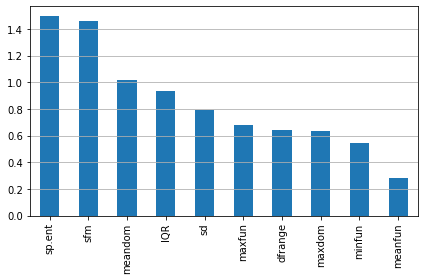

In [427]:
per_imp = pd.Series(model_svm.support_vectors_[0], index=X_train.columns)
per_imp.nlargest(10).plot.bar()
plt.grid(axis="y")
plt.tight_layout()

SVM evidenzia come features di maggiore rilevanza: lo scarto interquantile, la frequenza dominante media, la piattezza spettrale e l'entropia spettrale. Tali features erano già state individuate nella fase esplorativa dei dati come probabili indicatori importanti per determinare una voce maschile o femminile.